In [158]:
#imports
from qiskit import*
from qiskit.tools.visualization import plot_bloch_multivector
import numpy as np
from numpy import linalg as LA
import random

In [159]:
#3 qubits for encoding and 2 syndrome qubits
circuit = QuantumCircuit(5,2,name="repitition_circ")

In [160]:
#initialize state vector
vector = np.array( [ 0,
                     1 ] )
def normalize(vector):
    return vector / LA.norm(vector)

vector = normalize(vector)

def initialize( vector ):
    circuit.initialize(vector.tolist(),0)

initialize(vector)

In [161]:
#encode
circuit.cx(0,1)
circuit.cx(0,2)


In [162]:
#error
def error():
    for i in range(3):
        if( random.random() < 0.2 ):
            circuit.x(i)
error() 


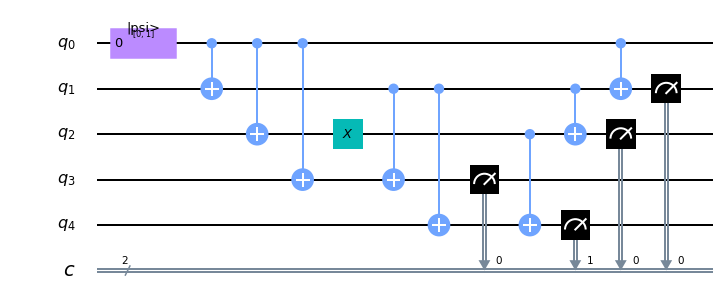

In [163]:
#correction
def correct():
    circuit.cx(0,3)
    circuit.cx(1,3)

    circuit.cx(1,4)
    circuit.cx(2,4)
    
    syndrome = [circuit.measure(3,0),circuit.measure(4,1)]
    
    if(syndrome == [1,0]):
        circuit.x(0)
    elif(syndrome == [0,1]):
        circuit.x(2)
    elif(syndrome == [1,1]):
        circuit.x(1)    
    
    #decode
    circuit.cx(1,2)
    circuit.measure(2,0)
    circuit.cx(0,1)
    circuit.measure(1,0)
    
correct()   
%matplotlib inline
circuit.draw(output = 'mpl')

In [164]:
#simulator
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit,backend = simulator)
result = job.result()
statevector = result.get_statevector()
print(statevector)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


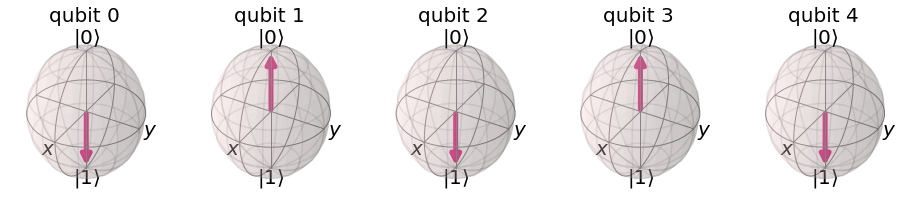

In [165]:
#plot qubit 0 is the corrected state
plot_bloch_multivector(statevector)